# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [2]:
import math
import sys

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [4]:
# YOUR CODE HERE
df = pd.read_csv("wine-quality-red.tsv", sep="\t")
df.sample(10)
df.dtypes


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
target                    int64
dtype: object

YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [5]:
# YOUR CODE HERE
df_cols = pd.DataFrame({"columns":df.columns})
df_cols

df_cols["description"] = ""
# fixed acidity
df_cols.loc[0, "description"] = "This is the how acidic the wine is, making it taste tart" 
# volatile acidity
df_cols.loc[1, "description"] = "Measures vinegar and ethyl acetate. Contributes to vinegar like aromas from the wine"
# citric acid
df_cols.loc[2, "description"] = "Measures citric acid content. Wine makers add citric acid to boost freshness and flavor"
# residual sugar
df_cols.loc[3, "description"] = "Sugar content in the wine. Contributes to the wines sweetness."
# chlorides
df_cols.loc[4, "description"] = "Measures salt concetration."
# free sulfur dioxide
df_cols.loc[5, "description"] = "Measures the active chlorides in wine. This acts as preservatives in wine."
# total sulfur dioxide
df_cols.loc[6, "description"] = "Measures active and inactive chloride in wine."
# density
df_cols.loc[7, "description"] = "Measures the sugar and alcohol content."
# pH
df_cols.loc[8, "description"] = "Acidity measure that affects tast and flavor intesity"
# sulphates
df_cols.loc[9, "description"] = "This impacts preservation and flavor intesity"
# alcohol
df_cols.loc[10, "description"] = "Alcohol percent by volume."
# target
df_cols.loc[11, "description"] = "The quality/rating given to the wine."

df_cols

,columns,description
0,fixed acidity,"This is the how acidic the wine is, making it ..."
1,volatile acidity,Measures vinegar and ethyl acetate. Contribute...
2,citric acid,Measures citric acid content. Wine makers add ...
3,residual sugar,Sugar content in the wine. Contributes to the ...
4,chlorides,Measures salt concetration.
5,free sulfur dioxide,Measures the active chlorides in wine. This ac...
6,total sulfur dioxide,Measures active and inactive chloride in wine.
7,density,Measures the sugar and alcohol content.
8,pH,Acidity measure that affects tast and flavor i...
9,sulphates,This impacts preservation and flavor intesity


YOUR ANSWERS HERE

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

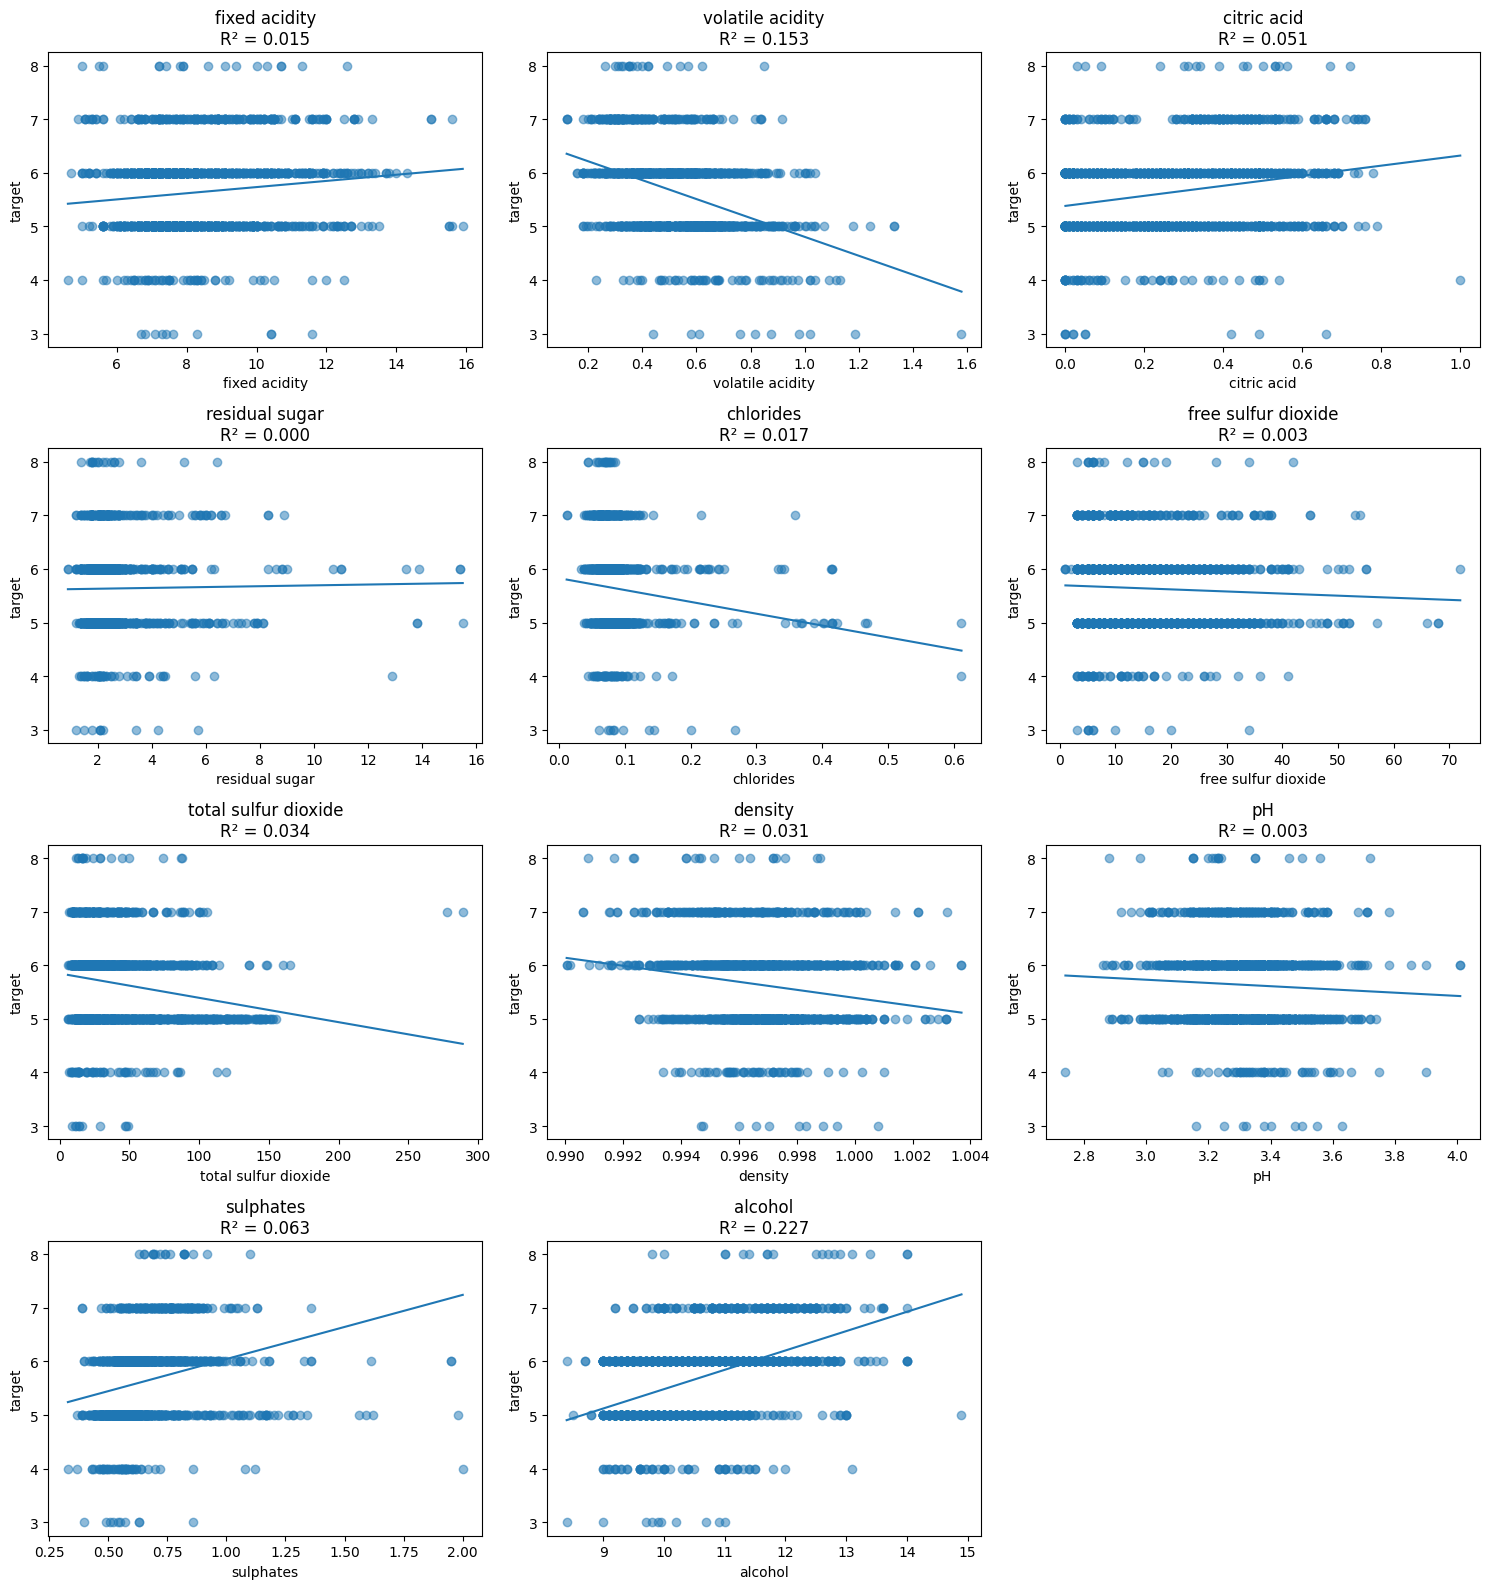

most interesting thing from this first chart is how poorly these can predict values. The highest R^2 value is .227, which means no single column can accuratly predict the wines quality.
this table shows the percentages and cumulative percents. Interesting to see 86% of of ratings are 6 and under


,count,percentage,cumulative_percentage
target,,,
3,10,0.006254,0.006254
4,53,0.033146,0.039400
5,681,0.425891,0.465291
6,638,0.398999,0.864290
7,199,0.124453,0.988743
8,18,0.011257,1.000000


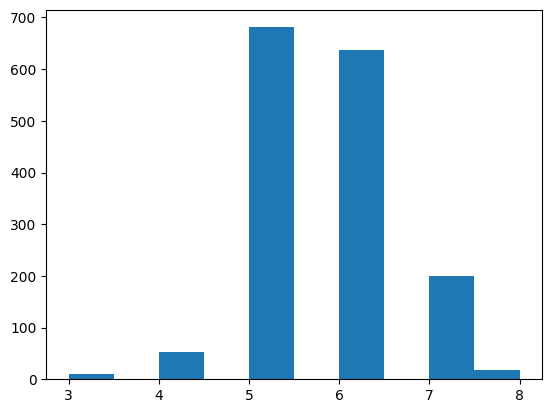

In [9]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression


inputs = df.drop(columns=["target"])
target = df["target"]

cols = inputs.columns
n_cols = 3                          # plots per row
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    X = inputs[[col]].values        # (n_samples, 1)
    y = target.values

    model = LinearRegression()
    model.fit(X, y)

    # regression line
    x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_line = model.predict(x_line)

    ax = axes[i]
    ax.scatter(X, y, alpha=0.5)
    ax.plot(x_line, y_line)
    ax.set_xlabel(col)
    ax.set_ylabel("target")
    ax.set_title(f"{col}\nR² = {model.score(X, y):.3f}")

# remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
print("most interesting thing from this first chart is how poorly these can predict values. The highest R^2 value is .227, which means no single column can accuratly predict the wines quality.")

# use categories. (3 - 6 = poor,  7 - 8 = high)
# histogram helps pick the categories. Most wine should be poor quality
plt.hist(target)

cumm_df = (
    target
    .value_counts()
    .sort_index()
    .rename("count")
    .to_frame()
)

print("this table shows the percentages and cumulative percents. Interesting to see 86% of of ratings are 6 and under")
cumm_df["percentage"] = cumm_df["count"]/cumm_df["count"].sum()
cumm_df["cumulative_percentage"] = cumm_df["percentage"].cumsum()

cumm_df

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

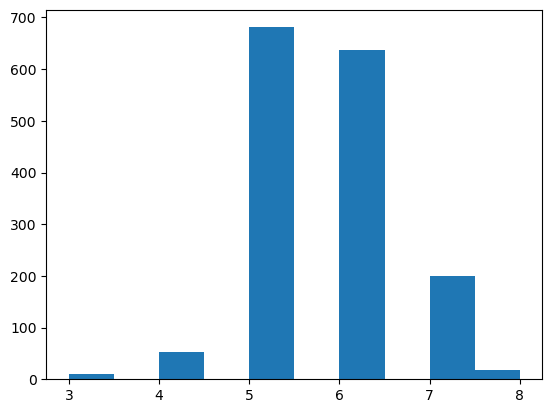

In [61]:
plt.hist(target)

YOUR ANSWERS HERE

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

In [10]:
# YOUR CODE HERE
corr = df.corr()
corr 

corr_no_1 = corr.where(~np.eye(corr.shape[0], dtype=bool))
max_pair = corr_no_1.abs().stack().idxmax()
max_value = corr_no_1.abs().stack().max()

max_pair, max_value

(('fixed acidity', 'pH'), np.float64(0.6829781945685302))

YOUR ANSWERS HERE

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [ ]:
# YOUR CODE HERE
# linear regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

lin_r2 = r2_score(y, y_pred)
lin_mse = mean_squared_error(y, y_pred)

print(f"""Linear Regression
R2:{lin_r2}
mse:{lin_mse}
""")

# K nearest neighbor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X, y)

y_pred = knn.predict(X)

knn_r2 = r2_score(y, y_pred)
knn_mse = mean_squared_error(y, y_pred)

print(f"""K Nearest Neigbor
R2:{knn_r2}
mse:{knn_mse}
""")

# random forest
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X,y)

y_pred = rf.predict(X)

rf_r2 = r2_score(y, y_pred)
rf_mse = mean_squared_error(y, y_pred)

print(f"""Random Forest
R2:{rf_r2}
mse:{rf_mse}
""")



Linear Regression
R2:0.22673436811275494
mse:0.503984025671457

K Nearest Neigbor
R2:0.12351699629505608
mse:0.5712570356472796

Random Forest
R2:0.2785955489132035
mse:0.47018295447669245



YOUR ANSWERS HERE

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

In [25]:
# YOUR CODE HERE
from sklearn.metrics import mean_absolute_error, mean_squared_error
#linear regression
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

lin_l1 = mean_absolute_error(y, y_pred)
lin_l2 = mean_squared_error(y, y_pred)

print(f"""Linear Regression
l1:{lin_l1}
l2:{lin_l2}
""")

# K nearest neighbor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X, y)

y_pred = knn.predict(X)

knn_l1 = mean_absolute_error(y, y_pred)
knn_l2 = mean_squared_error(y, y_pred)

print(f"""K Nearest Neigbor
l1:{knn_l1}
l2:{knn_l2}
""")

# random forest
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X,y)

y_pred = rf.predict(X)

rf_l1 = mean_absolute_error(y, y_pred)
rf_l2 = mean_squared_error(y, y_pred)

print(f"""Random Forest
l1:{rf_r2}
l2:{rf_mse}
""")



Linear Regression
l1:0.5621255750586157
l2:0.503984025671457

K Nearest Neigbor
l1:0.5916197623514696
l2:0.5712570356472796

Random Forest
l1:0.2785955489132035
l2:0.47018295447669245



YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [ ]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [ ]:
# YOUR CODE HERE 

YOUR ANSWERS HERE